# Kaggle Competition : House Prices

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import scipy.stats
from pycaret.regression import compare_models,setup
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, Ridge, OrthogonalMatchingPursuit 
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,
from sklearn.model_selection import KFold,cross_val_score

from xgboost import XGBRFRegressor

In [2]:
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


# Cleaning Data

In [7]:
train0.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
test0.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

# Combining Train & Test Dataset

In [10]:
target = train0['SalePrice']
test_ids = test0['Id']

train1 = train0.drop(['Id','SalePrice'],axis = 1)
test1 = test0.drop(['Id'],axis=1)

data1 = pd.concat([train1,test1],axis=0).reset_index(drop=True)
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Ensure Proper Data Types

In [12]:
data2 = data1.copy()

In [13]:
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

In [14]:
data1.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


# Fill Categorical Missing Values

In [16]:
# impute using the column value
for column in [
    
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 
    'GarageFinish', 
    'GarageQual', 
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data2[column] = data2[column].fillna("None")
    
    
# impute using column mode
for column in [
    
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
     data2[column] = data2[column].fillna(data2[column].mode()[0])

In [17]:
data2.select_dtypes('object').loc[:,data2.isna().sum()> 0].columns

Index([], dtype='object')

In [18]:
data2.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [19]:
data3 = data2.copy()

# Numeric Missing Values

In [21]:
data3.select_dtypes(np.number).isna().sum()

LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [22]:
def knn_impute(df,na_target):
    df=df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna()==False,na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna()==False,non_na_columns]       
    X_test = numeric_df.loc[numeric_df[na_target].isna()==True,non_na_columns]
    
    knn= KNeighborsRegressor()
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True,na_target] = y_pred
    
    
    return df

In [23]:
data3.columns[data3.isna().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [24]:
for column in [
    'LotFrontage', 
    'MasVnrArea', 
    'BsmtFinSF1', 
    'BsmtFinSF2', 
    'BsmtUnfSF',
    'TotalBsmtSF', 
    'BsmtFullBath', 
    'BsmtHalfBath', 
    'GarageYrBlt',
    'GarageCars', 
    'GarageArea'
]: data3 = knn_impute(data3,column)

In [25]:
data3.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [26]:
data4 = data3.copy()

# Feature Transformation
## Log Tranformation

In [28]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature:scipy.stats.skew(data4[feature]))

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)

skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x : True if x >=0.5 else False)

skew_df 

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [29]:
data4[skew_df.query("Skewed == True")['Feature'].values].describe()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,70.154916,10168.114080,5.564577,1971.312778,102.189654,441.332580,49.576841,560.797670,1051.679822,1159.581706,...,1.044536,6.451524,0.597122,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,22.697641,7886.996359,1.113131,30.291442,178.934095,455.559081,169.176867,439.470508,440.722380,392.362079,...,0.214462,1.569379,0.646129,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,21.000000,1300.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7478.000000,5.000000,1953.500000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,9453.000000,5.000000,1973.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,...,1.000000,6.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.100000,11570.000000,6.000000,2001.000000,164.000000,733.000000,0.000000,805.000000,1302.000000,1387.500000,...,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,9.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,3.000000,15.000000,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [30]:
skew_df.query("Skewed == True")['Feature'].values

array(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

In [31]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data4[column] = np.log1p(data4[column])

In [32]:
data4['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

# Cosine Tranform for Cyclical Features
# -cos(0.5236x)

In [34]:
data4['MoSold'] = (-np.cos(0.5236 * data4['MoSold']))

In [35]:
data5 = data4.copy()

# Encode Categoricals

In [37]:
data5 = pd.get_dummies(data5)
data5

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.0,6.304449,...,0,0,0,1,0,0,0,0,1,0
2915,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.0,5.686975,...,0,0,0,1,1,0,0,0,0,0
2916,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,7.110696,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.0,6.356108,...,0,0,0,1,0,0,0,0,1,0


In [38]:
data6 = data5.copy()

# Scaling

In [40]:
scaler = StandardScaler()
scaler.fit(data6)
data6 = pd.DataFrame(scaler.transform(data6),columns=data6.columns,index=data6.index)

In [41]:
data6

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


# Target Tranformation

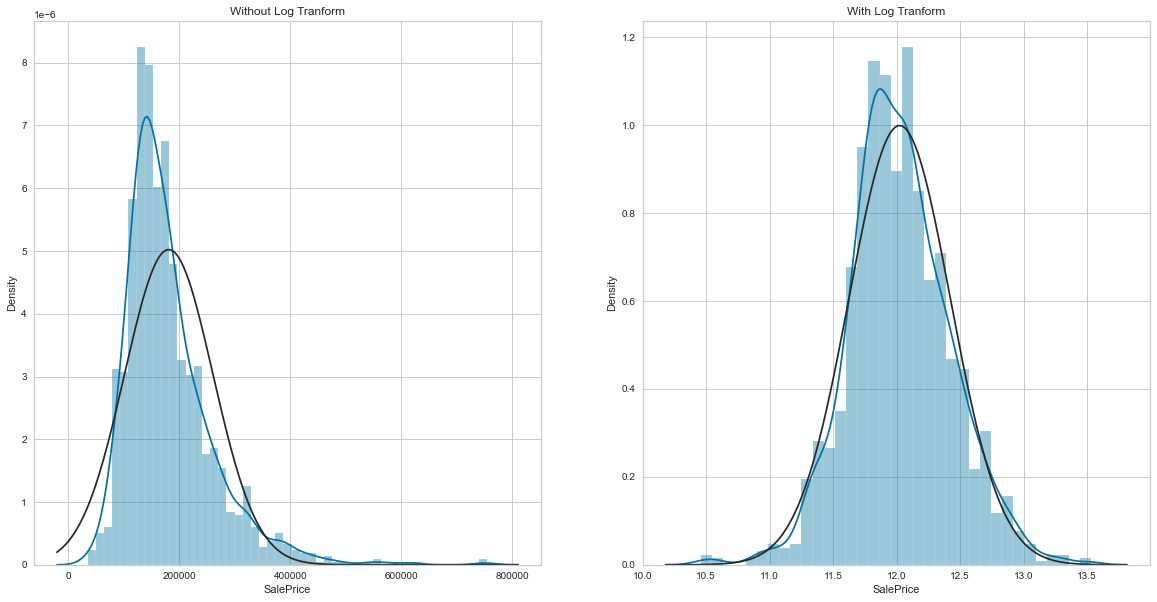

In [43]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(target,kde=True,fit=scipy.stats.norm)
plt.title("Without Log Tranform")


plt.subplot(1,2,2)
plt.title("With Log Tranform")
sns.distplot(np.log(target),kde=True,fit=scipy.stats.norm)

plt.show()

In [44]:
log_target = np.log(target)
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# Split the data

In [46]:
train0.index

RangeIndex(start=0, stop=1460, step=1)

In [47]:
test0.index

RangeIndex(start=0, stop=1459, step=1)

In [48]:
train_final = data6.loc[:train0.index.max(),:].copy()
test_final = data6.loc[train0.index.max() + 1:,:].reset_index(drop=True).copy()

In [49]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804554,-0.105594,3.329113,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [50]:
test_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1455,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1456,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1457,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


# Model Selection

In [52]:
_ = setup(data=pd.concat([train_final,log_target],axis=1),target='SalePrice')

,Description,Value
0,Session id,6140
1,Target,SalePrice
2,Target type,regression
3,Data shape,"(1460, 318)"
4,Train data shape,"(1021, 318)"
5,Test data shape,"(439, 318)"
6,Numeric features,317
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [53]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0806,0.0151,0.1221,0.8998,0.0095,0.0067,1.0460
gbr,Gradient Boosting Regressor,0.0877,0.0171,0.1300,0.8864,0.0101,0.0073,0.1310
lightgbm,Light Gradient Boosting Machine,0.0917,0.0187,0.1363,0.8749,0.0106,0.0077,0.1330
br,Bayesian Ridge,0.0883,0.0202,0.1385,0.8653,0.0107,0.0074,0.0530
xgboost,Extreme Gradient Boosting,0.0971,0.0204,0.1418,0.8642,0.0110,0.0081,0.4010
omp,Orthogonal Matching Pursuit,0.0868,0.0204,0.1387,0.8616,0.0107,0.0073,0.0220
rf,Random Forest Regressor,0.0982,0.0216,0.1460,0.8574,0.0113,0.0082,0.3090
et,Extra Trees Regressor,0.0993,0.0217,0.1465,0.8573,0.0114,0.0083,0.3080
ridge,Ridge Regression,0.0918,0.0228,0.1467,0.8477,0.0113,0.0077,0.0250
ada,AdaBoost Regressor,0.1276,0.0297,0.1716,0.8029,0.0133,0.0107,0.0820


# baseLine Model : Catboost Regression

In [56]:
baseline_model = CatBoostRegressor(verbose=0)

In [57]:
baseline_model.fit(train_final,log_target)

In [59]:
# Evalute 

In [65]:
kf = KFold(n_splits=10)
results = cross_val_score(baseline_model,train_final,log_target,scoring='neg_mean_squared_error',cv=kf)

/Users/ravatez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/Users/ravatez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 67 iterations, i.e. alpha=2.244e-04, with an active set of 67 regressors, and the smallest cholesky pivot element being 2.220e-16. Re

In [68]:
-results

array([0.01222066, 0.00861898, 0.01198061, 0.0239701 , 0.02067154,
       0.009341  , 0.01482743, 0.00970544, 0.01387597, 0.01533224])

<Figure size 1152x720 with 0 Axes>

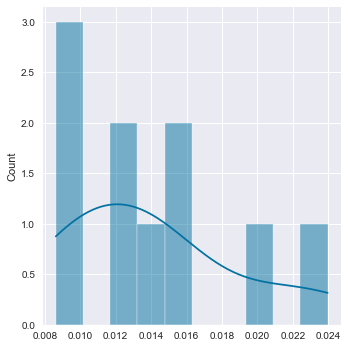

In [71]:
plt.figure(figsize=(16,10))

sns.displot(-results,bins=10,kde=True)

In [72]:
np.mean(-results)

0.014054396027584945

In [74]:
np.exp(np.sqrt(np.mean(-results)))

1.125864559654639

In [76]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# First Submission with single model

In [78]:
test_ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [80]:
predictions = np.exp(baseline_model.predict(test_final))

In [81]:
predictions

array([127085.71812469, 161824.85861972, 185151.82806767, ...,
       169464.66937483, 113706.59619319, 224308.63331787])

# First Submission To Check Score

In [83]:
submission = pd.concat([test_ids,pd.Series(predictions,name='SalePrice')],axis=1)

In [84]:
submission.to_csv('./submission.csv',index=False,header=True)

# First Submission score was 0.12507

# Bagging Ensembling

In [87]:
models = {
    "catboost" : CatBoostRegressor(verbose=0),
    "br" : BayesianRidge(),
    "omp": OrthogonalMatchingPursuit(),
    "xgboost" : XGBRFRegressor(),
    "gbr" : GradientBoostingRegressor(),
    "lightgbm" : LGBMRegressor()
}

In [89]:
for name, model in models.items():
    model.fit(train_final,log_target)
    print(name+"Trained.")

catboostTrained.
brTrained.
ompTrained.
xgboostTrained.
gbrTrained.
lightgbmTrained.


# Evalute

In [120]:
results = {}

kf = KFold(n_splits=10)

for name,model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target,scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [121]:
results

{'catboost': array([1.11688896, 1.09728449, 1.11567096, 1.16745106, 1.15462545,
        1.10147351, 1.12949197, 1.10353225, 1.12501491, 1.13181598]),
 'br': array([1.12647591, 1.10785636, 1.12698884, 1.16898827, 1.1538688 ,
        1.14270592, 1.12838629, 1.1032448 , 1.19869609, 1.13673483]),
 'omp': array([1.12550453, 1.09788011, 1.11981216, 1.17679697, 1.1555808 ,
        1.16092027, 1.13376685, 1.10647897, 1.19143393, 1.13965602]),
 'xgboost': array([1.16323063, 1.14445404, 1.15855399, 1.19236976, 1.20296408,
        1.12999278, 1.16026268, 1.13978453, 1.17624852, 1.16902963]),
 'gbr': array([1.13923   , 1.10823773, 1.12377483, 1.17719562, 1.16576629,
        1.11667888, 1.13701793, 1.11417193, 1.12281349, 1.15117821]),
 'lightgbm': array([1.13932123, 1.11056857, 1.12900261, 1.1753656 , 1.17158268,
        1.11182928, 1.138628  , 1.11294699, 1.13512447, 1.15299037])}

In [122]:
for name, model in results.items():
    print("\n--------------\n"+ name + "\n--------------\n")
    print(np.mean(result))
    print(np.std(result))


--------------
catboost
--------------

1.1377359781040313
0.022145888157476156

--------------
br
--------------

1.1377359781040313
0.022145888157476156

--------------
omp
--------------

1.1377359781040313
0.022145888157476156

--------------
xgboost
--------------

1.1377359781040313
0.022145888157476156

--------------
gbr
--------------

1.1377359781040313
0.022145888157476156

--------------
lightgbm
--------------

1.1377359781040313
0.022145888157476156


# Combine Predictions

In [124]:
final_predictions = (
    0.6 * np.exp(models['catboost'].predict(test_final)) + 
    0.1 * np.exp(models['br'].predict(test_final)) +
    0.1 * np.exp(models['omp'].predict(test_final)) +
    0.1 * np.exp(models['xgboost'].predict(test_final)) +
    0.1 * np.exp(models['gbr'].predict(test_final))
)

final_predictions

array([126216.35666588, 159635.34054135, 183777.35808321, ...,
       165916.93260684, 115629.68211438, 225731.96912388])

# Second Submission with boosting ensembling

# Submission 2

In [127]:
submission = pd.concat([test_ids,pd.Series(final_predictions,name='SalePrice')],axis=1)

In [128]:
submission.to_csv('./submission2.csv',index=False,header=True)

# First Submission Score : 0.12507
# Second Submission Score : 0.12422

# Feature Engineering

In [132]:
data4["SqFtPerRoom"] = data4["GrLivArea"] / (data4["TotRmsAbvGrd"] +
                                                       data4["FullBath"] +
                                                       data4["HalfBath"] +
                                                       data4["KitchenAbvGr"])

data4['Total_Home_Quality'] = data4['OverallQual'] + data4['OverallCond']

data4['Total_Bathrooms'] = (data4['FullBath'] + (0.5 * data4['HalfBath']) +
                               data4['BsmtFullBath'] + (0.5 * data4['BsmtHalfBath']))

data4["HighQualSF"] = data4["1stFlrSF"] + data4["2ndFlrSF"]

In [133]:
data4

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.000000,-0.499998,2008,WD,Normal,1.333359,8.791759,3.039721,13.504539
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,None,0.000000,0.866028,2007,WD,Normal,1.539374,8.197225,2.346574,7.141245
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,None,0.000000,-0.000011,2008,WD,Normal,1.404352,8.791759,3.039721,13.590499
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,None,0.000000,-0.499998,2006,WD,Abnorml,1.974484,8.791759,1.693147,13.498378
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,None,0.000000,-1.000000,2008,WD,Normal,1.352772,9.791759,3.039721,14.004381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.091042,7.568896,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.000000,1.000000,2006,WD,Normal,1.674627,6.079442,1.346574,12.608898
2915,160,RM,3.091042,7.546974,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.000000,0.500004,2006,WD,Abnorml,1.615040,5.791759,1.346574,12.608898
2916,20,RL,5.081404,9.903538,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.000000,-0.000011,2006,WD,Abnorml,1.884832,7.079442,1.693147,7.110696
2917,85,RL,4.143135,9.253591,Pave,None,Reg,Lvl,AllPub,Inside,...,Shed,6.552508,0.866021,2006,WD,Normal,1.890140,6.791759,1.346574,6.878326


In [134]:
data5 = data4.copy()

In [135]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature:scipy.stats.skew(data5[feature]))

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)

skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x : True if x >=0.5 else False)

skew_df 

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,-0.929468,0.929468,True
1,LotArea,-0.504751,0.504751,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,-0.746183,0.746183,True
4,YearBuilt,-0.626215,0.626215,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,0.511138,0.511138,True
7,BsmtFinSF1,-0.618036,0.618036,True
8,BsmtFinSF2,2.458996,2.458996,True
9,BsmtUnfSF,-2.159204,2.159204,True


In [136]:
data5[skew_df.query("Skewed == True")['Feature'].values].describe()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtHalfBath,HalfBath,KitchenAbvGr,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,4.211550,9.094915,1.867152,7.586843,2.109776,4.226730,0.682190,5.627430,6.733109,0.077100,0.042111,0.261117,0.710829,0.757435,0.066197,0.451214,0.027361,0.234767,0.342866
std,0.341238,0.509882,0.173171,0.015433,2.622741,2.980867,1.879238,1.866516,1.175876,0.659472,0.167439,0.341563,0.088196,1.771894,0.587089,1.459808,0.410265,1.240206,0.666529
min,3.091042,7.170888,0.693147,7.535297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,4.110874,8.919854,1.791759,7.577890,0.000000,0.000000,0.000000,5.398163,6.677083,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000011
50%,4.262680,9.154193,1.791759,7.587817,0.000000,5.910797,0.000000,6.148468,6.897705,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.500004
75%,4.395682,9.356257,1.945910,7.601902,5.105945,6.598509,0.000000,6.692083,7.172425,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.866028
max,5.749393,12.279537,2.302585,7.606387,7.378384,8.638525,7.331060,7.756623,8.717846,6.970730,1.098612,1.098612,1.386294,6.920672,6.232448,6.357842,6.685861,9.741027,1.000000


In [137]:
data5['MoSold'] = (-np.cos(0.5236 * data5['MoSold']))

In [138]:
data6 = data5.copy()

In [139]:
data6 = pd.get_dummies(data6)
data6

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.0,6.304449,...,0,0,0,1,0,0,0,0,1,0
2915,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.0,5.686975,...,0,0,0,1,1,0,0,0,0,0
2916,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,7.110696,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.0,6.356108,...,0,0,0,1,0,0,0,0,1,0


In [140]:
data7 = data6.copy()

In [142]:
scaler = StandardScaler()
scaler.fit(data7)
data7 = pd.DataFrame(scaler.transform(data7),columns=data7.columns,index=data7.index)

In [143]:
data8 = data7.copy()

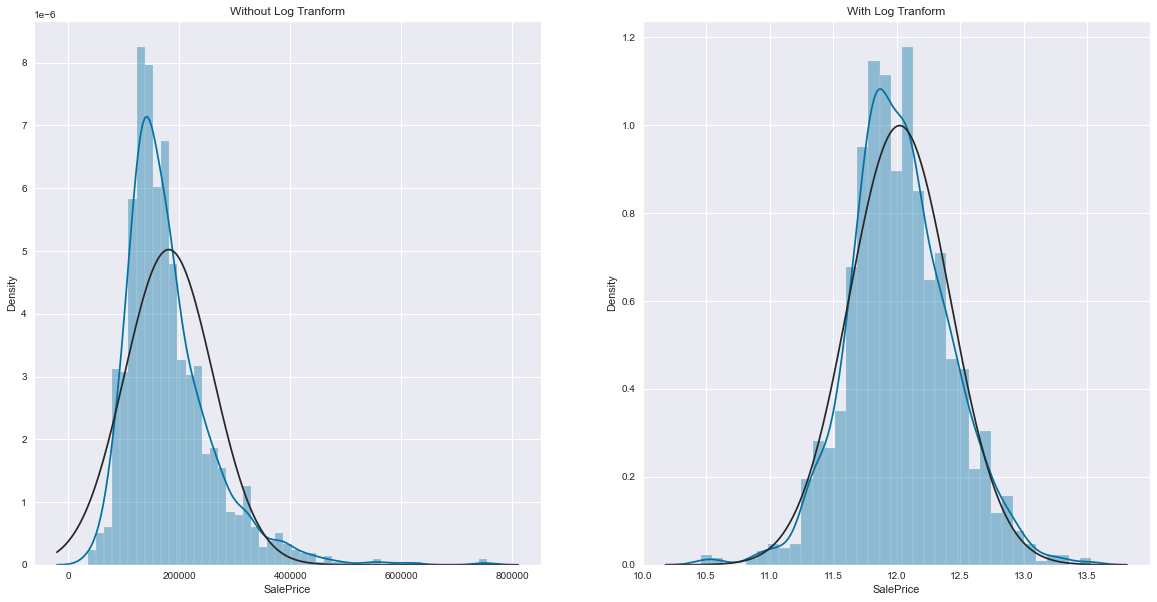

In [144]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(target,kde=True,fit=scipy.stats.norm)
plt.title("Without Log Tranform")


plt.subplot(1,2,2)
plt.title("With Log Tranform")
sns.distplot(np.log(target),kde=True,fit=scipy.stats.norm)

plt.show()

In [145]:
log_target = np.log(target)
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [147]:
train_final = data8.loc[:train0.index.max(),:].copy()
test_final = data8.loc[train0.index.max() + 1:,:].reset_index(drop=True).copy()

In [148]:
_ = setup(data=pd.concat([train_final,log_target],axis=1),target='SalePrice')

,Description,Value
0,Session id,8472
1,Target,SalePrice
2,Target type,regression
3,Data shape,"(1460, 322)"
4,Train data shape,"(1021, 322)"
5,Test data shape,"(439, 322)"
6,Numeric features,321
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [149]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0828,0.0164,0.1260,0.8960,0.0097,0.0069,1.2290
gbr,Gradient Boosting Regressor,0.0868,0.0176,0.1300,0.8897,0.0100,0.0072,0.1400
lightgbm,Light Gradient Boosting Machine,0.0923,0.0186,0.1350,0.8809,0.0104,0.0077,0.1320
br,Bayesian Ridge,0.0881,0.0191,0.1357,0.8777,0.0104,0.0074,0.0520
xgboost,Extreme Gradient Boosting,0.0986,0.0221,0.1458,0.8607,0.0112,0.0082,0.3870
et,Extra Trees Regressor,0.1002,0.0223,0.1477,0.8586,0.0114,0.0084,0.3570
rf,Random Forest Regressor,0.0996,0.0224,0.1485,0.8578,0.0114,0.0083,0.3460
ridge,Ridge Regression,0.0935,0.0235,0.1499,0.8504,0.0115,0.0078,0.0230
omp,Orthogonal Matching Pursuit,0.0968,0.0297,0.1614,0.8153,0.0124,0.0081,0.0230
ada,AdaBoost Regressor,0.1319,0.0313,0.1757,0.8004,0.0135,0.0110,0.0890


# Bagging Ensembling

In [152]:
baseline_model = CatBoostRegressor(verbose=0)

In [153]:
baseline_model.fit(train_final,log_target)

In [154]:
kf = KFold(n_splits=10)
results = cross_val_score(baseline_model,train_final,log_target,scoring='neg_mean_squared_error',cv=kf)

In [155]:
-results

array([0.01287366, 0.00928396, 0.01140038, 0.02425723, 0.02088808,
       0.0109415 , 0.01397252, 0.00979594, 0.01474886, 0.01650561])

In [156]:
predictions = np.exp(baseline_model.predict(test_final))

In [157]:
submission = pd.concat([test_ids,pd.Series(predictions,name='SalePrice')],axis=1)

In [159]:
submission.to_csv('./submission3.csv',index=False,header=True)

In [160]:
# Third Submission

In [161]:
models = {
    "catboost" : CatBoostRegressor(verbose=0),
    "br" : BayesianRidge(),
    "omp": OrthogonalMatchingPursuit(),
    "xgboost" : XGBRFRegressor(),
    "gbr" : GradientBoostingRegressor(),
    "lightgbm" : LGBMRegressor()
}

In [162]:
for name, model in models.items():
    model.fit(train_final,log_target)
    print(name+"Trained.")

catboostTrained.
brTrained.
ompTrained.
xgboostTrained.
gbrTrained.
lightgbmTrained.


In [163]:
results = {}

kf = KFold(n_splits=10)

for name,model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target,scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [164]:
for name, model in results.items():
    print("\n--------------\n"+ name + "\n--------------\n")
    print(np.mean(result))
    print(np.std(result))


--------------
catboost
--------------

1.1386029119125733
0.02294325423598389

--------------
br
--------------

1.1386029119125733
0.02294325423598389

--------------
omp
--------------

1.1386029119125733
0.02294325423598389

--------------
xgboost
--------------

1.1386029119125733
0.02294325423598389

--------------
gbr
--------------

1.1386029119125733
0.02294325423598389

--------------
lightgbm
--------------

1.1386029119125733
0.02294325423598389


In [165]:
final_predictions = (
    0.6 * np.exp(models['catboost'].predict(test_final)) + 
    0.1 * np.exp(models['br'].predict(test_final)) +
    0.1 * np.exp(models['omp'].predict(test_final)) +
    0.1 * np.exp(models['xgboost'].predict(test_final)) +
    0.1 * np.exp(models['gbr'].predict(test_final))
)

final_predictions

array([122859.99848173, 162293.33561384, 184242.12529034, ...,
       159652.43065463, 116624.17601611, 225869.06937386])

In [166]:
submission = pd.concat([test_ids,pd.Series(final_predictions,name='SalePrice')],axis=1)

In [167]:
submission.to_csv('./submission4.csv',index=False,header=True)

# Out performing of the submission 3 & 4

# Bagging Ensemble

In [171]:
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}

br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}

In [172]:
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "br": BayesianRidge(**br_params),
    "lightgbm": LGBMRegressor(**lightgbm_params),
    "ridge": Ridge(**ridge_params),
    "omp": OrthogonalMatchingPursuit()
}

In [173]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained.")

catboost trained.
br trained.
lightgbm trained.
ridge trained.
omp trained.


In [174]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

# Combine Prediction

In [177]:
final_predictions = (
    0.4 * np.exp(models['catboost'].predict(test_final)) +
    0.2 * np.exp(models['br'].predict(test_final)) +
    0.2 * np.exp(models['lightgbm'].predict(test_final)) +
    0.1 * np.exp(models['ridge'].predict(test_final)) +
    0.1 * np.exp(models['omp'].predict(test_final))
)

In [178]:
final_predictions

array([122758.95914263, 158256.97597364, 181858.65242769, ...,
       163268.50582875, 117293.2215315 , 224086.52549732])

# Make 5th Submission :

In [180]:
submission = pd.concat([test_ids, pd.Series(final_predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,122758.959143
1,1462,158256.975974
2,1463,181858.652428
3,1464,195436.351689
4,1465,193153.565677
...,...,...
1454,2915,80554.815036
1455,2916,81480.724659
1456,2917,163268.505829
1457,2918,117293.221531


In [181]:
submission.to_csv('./submission5.csv', index=False, header=True)

# 5th Submission Scored improved

# First Submission Score : 0.12507
# Second Submission Score : 0.12422
# Fifth Submission Score : 0.12272
